<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/SIR_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [67]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [68]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [69]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [70]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [71]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [72]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [83]:
data = np.array(S_value.iloc[0]).reshape(100,1)

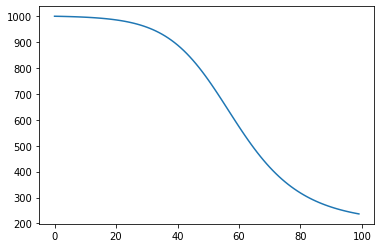

In [74]:
plt.plot(data)

In [36]:
train = data[0:10]
test = data[10:20]

In [37]:
train

array([[999.        ],
       [998.1651592 ],
       [996.98393956],
       [995.31473469],
       [992.96014665],
       [989.64708173],
       [985.00178779],
       [978.52061948],
       [969.53988012],
       [957.21289669]])

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [44]:
# define generator
n_input = 9
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [45]:
X,y = generator[0]

In [46]:
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [47]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [48]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 244ms/step - loss: 0.0063
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 3/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 9.1095e-04
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 2.3306e-04
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 2.9531e-06
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 1.0124e-04
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 3.8138e-04
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 6.7949e-04
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 8.7967e-04
Epoch 11/50
1/1 [==============================] - 0s 5ms/step - loss: 9.4178e-04
Epoch 12/50
1/1 [==============================] - 0s 5ms/step - loss: 8.7942e-04
Epoch 13/50
1/1 [==================

In [49]:
model.history.history.keys()

dict_keys(['loss'])

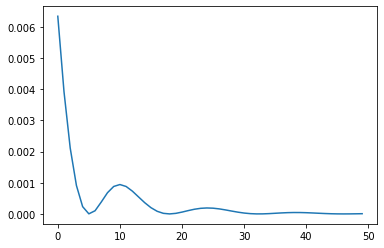

In [50]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [51]:
scaled_test

array([[ -0.39970942],
       [ -0.93197134],
       [ -1.62469458],
       [ -2.50014162],
       [ -3.56689548],
       [ -4.81157562],
       [ -6.19427393],
       [ -7.65175461],
       [ -9.10918075],
       [-10.496035  ]])

In [52]:
first_eval_batch = scaled_train[-9:]

In [53]:
first_eval_batch

array([[0.98002157],
       [0.951754  ],
       [0.91180855],
       [0.85546131],
       [0.77617692],
       [0.66501119],
       [0.50991146],
       [0.29499493],
       [0.        ]])

In [54]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [55]:

model.predict(first_eval_batch)

array([[0.00373216]], dtype=float32)

In [56]:
scaled_test

array([[ -0.39970942],
       [ -0.93197134],
       [ -1.62469458],
       [ -2.50014162],
       [ -3.56689548],
       [ -4.81157562],
       [ -6.19427393],
       [ -7.65175461],
       [ -9.10918075],
       [-10.496035  ]])

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [58]:
test_predictions

[array([0.00373216], dtype=float32),
 array([0.0075497], dtype=float32),
 array([0.00971445], dtype=float32),
 array([0.01091411], dtype=float32),
 array([0.01151202], dtype=float32),
 array([0.01161082], dtype=float32),
 array([0.01142826], dtype=float32),
 array([0.01121727], dtype=float32),
 array([0.01106316], dtype=float32),
 array([0.01110716], dtype=float32)]

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)

In [60]:
true_predictions

array([[957.36885272],
       [957.5283768 ],
       [957.61883529],
       [957.66896576],
       [957.69395076],
       [957.69807926],
       [957.69045074],
       [957.68163383],
       [957.67519423],
       [957.67703288]])

In [61]:
test = pd.DataFrame(test)

In [62]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [63]:
test

,0,Predictions
0,940.510198,957.368853
1,918.268514,957.528377
2,889.321616,957.618835
3,852.739221,957.668966
4,808.162667,957.693951
5,756.151089,957.698079
6,698.372132,957.690451
7,637.468236,957.681634
8,576.566619,957.675194
9,518.613998,957.677033


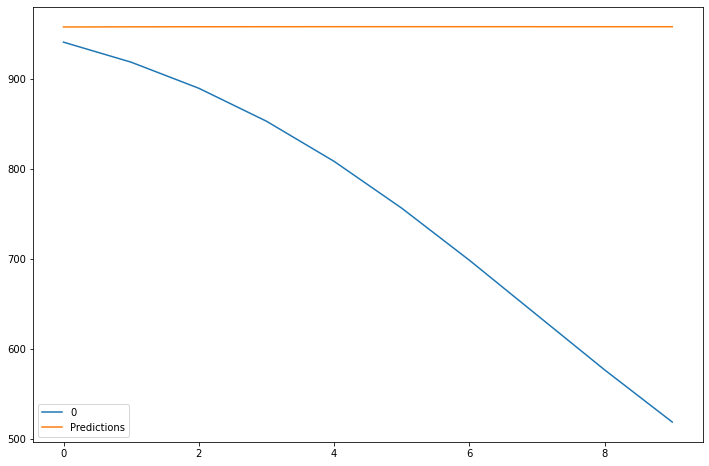

In [64]:
test.plot(figsize=(12,8))